Data Types of Attributes:
 Filename        object
Class Label      int64
f0             float64
f1             float64
f2             float64
                ...   
f195           float64
f196           float64
f197           float64
f198           float64
f199           float64
Length: 202, dtype: object

Missing Values:
 Filename       0
Class Label    0
f0             0
f1             0
f2             0
              ..
f195           0
f196           0
f197           0
f198           0
f199           0
Length: 202, dtype: int64

Class Balance:

Class Label
1    50.230556
0    32.431602
2    17.337842
Name: proportion, dtype: float64


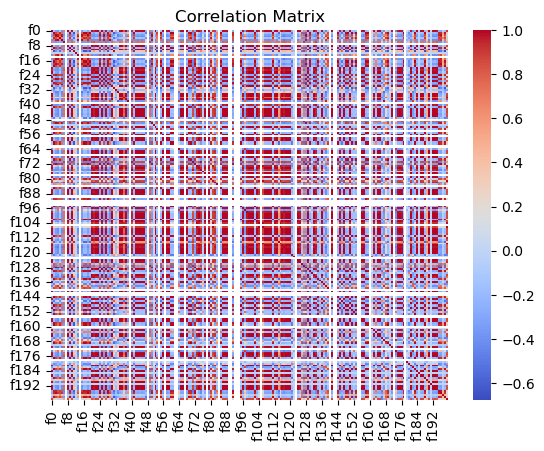


Matrix Rank: 174
Data Range Before Normalization:

f0: Min=0.0, Max=781.7894897
f1: Min=0.0, Max=459.2077942
f2: Min=0.0, Max=536.8796387
f3: Min=0.0, Max=760.7538452
f4: Min=0.0, Max=202.5984955
f5: Min=0.0, Max=587.2895508
f6: Min=0.0, Max=217.9820099
f7: Min=0, Max=0
f8: Min=0.0, Max=10129.19336
f9: Min=0.0, Max=260.7835388
f10: Min=0.0, Max=2553.293945
f11: Min=0.0, Max=490.7750549
f12: Min=0.0, Max=5.076484203
f13: Min=0.0, Max=824.3275757
f14: Min=0, Max=0
f15: Min=0.0, Max=925.8342896
f16: Min=0.0, Max=491.9936523
f17: Min=0.0, Max=855.3951416
f18: Min=0.0, Max=946.4156494
f19: Min=0.0, Max=304.9535217
f20: Min=0.0, Max=7331.959473
f21: Min=0.0, Max=2289.661621
f22: Min=0.0, Max=5208.731934
f23: Min=0.0, Max=7161.616699
f24: Min=0.0, Max=860.7988892
f25: Min=0.0, Max=3623.147705
f26: Min=0.0, Max=814.3405151
f27: Min=0.0, Max=2309.880127
f28: Min=0.0, Max=892.9552002
f29: Min=0.0, Max=747.4198608
f30: Min=0.0, Max=4640.673828
f31: Min=0.0, Max=506.3163452
f32: Min=0.0, Max=24.4

In [29]:
#A1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from numpy.linalg import matrix_rank

# Load the dataset
def load_dataset(file_path):
    return pd.read_csv(file_path)

def check_data_types(df):
    print("Data Types of Attributes:\n", df.dtypes)

def check_missing_values(df):
    missing_values = df.isnull().sum()
    print("\nMissing Values:\n", missing_values)
    return missing_values

def impute_missing_values(df, strategy='mean'):
    imputer = SimpleImputer(strategy=strategy)
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    return df_imputed

def check_class_balance(df, target_column):
    print("\nClass Balance:\n")
    print(df[target_column].value_counts(normalize=True) * 100)

def plot_correlation_matrix(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    if numeric_df.empty:
        print("No numeric columns found for correlation matrix.")
        return None
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
    plt.title("Correlation Matrix")
    plt.show()
    return correlation_matrix


def study_matrix_rank(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    if numeric_df.empty:
        print("No numeric columns found for matrix rank calculation.")
        return None
    rank = matrix_rank(numeric_df.values)
    print("\nMatrix Rank:", rank)
    return rank


def data_range_and_normalization(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    
    if numeric_df.empty:
        print("No numeric columns found for normalization.")
        return None

    # Data range before normalization
    print("Data Range Before Normalization:\n")
    for column in numeric_df.columns:
        print(f"{column}: Min={numeric_df[column].min()}, Max={numeric_df[column].max()}")

    # Normalization using MinMaxScaler
    scaler = MinMaxScaler()
    normalized_array = scaler.fit_transform(numeric_df)
    df_normalized = pd.DataFrame(normalized_array, columns=numeric_df.columns)

    # Data range after normalization
    print("\nData Range After Normalization:\n")
    for column in df_normalized.columns:
        print(f"{column}: Min={df_normalized[column].min()}, Max={df_normalized[column].max()}")
    
    return df_normalized


if __name__ == "__main__":
    target_column = "Class Label"  # Update with the actual target column

    # Load dataset
    df = load_dataset("Custom_CNN_Features.csv")

    # Check data types
    check_data_types(df)

    # Check and impute missing values
    missing_values = check_missing_values(df)
    if missing_values.sum() > 0:
        df = impute_missing_values(df)
        print("\nMissing values imputed.")

    # Check class balance
    if target_column in df.columns:
        check_class_balance(df, target_column)
    else:
        print("\nTarget column not found for class balance analysis.")

    # Drop the target column for further analysis if necessary
    df_features = df.drop(columns=[target_column], errors='ignore')

    # Correlation matrix and heatmap
    correlation_matrix = plot_correlation_matrix(df_features)

    # Study matrix rank
    rank = study_matrix_rank(df_features)

    # Data range and normalization
    df_normalized = data_range_and_normalization(df_features)

In [17]:
#A2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

def split_train_test(df_normalized, target_column, test_size=0.25, random_state=42):
    if target_column not in df.columns:
        raise ValueError(f"Target column '{target_column}' not found in dataset.")
    X = df_normalized
    y = df[target_column]
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def evaluate_model(y_test, y_pred, y_proba=None):
    print("\nEvaluation Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    
    if y_proba is not None:
        try:
            print(f"AUROC: {roc_auc_score(y_test, y_proba, average='weighted', multi_class='ovr'):.4f}")
        except ValueError as e:
            print(f"AUROC could not be calculated: {e}")

def classify_and_evaluate(X_train, X_test, y_train, y_test):
    models = {
        "k-Nearest Neighbors": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "Support Vector Machine": SVC(probability=True),
        "Random Forest": RandomForestClassifier(),
        "Naïve Bayes": GaussianNB()
    }

    for model_name, model in models.items():
        print(f"\nTraining and Evaluating {model_name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        evaluate_model(y_test, y_pred, y_proba)

if __name__ == "__main__":
    # Ensure the target column is part of the dataset
    if target_column not in df.columns:
        raise ValueError(f"Target column '{target_column}' not found in dataset.")

    # Train-test split
    X_train, X_test, y_train, y_test = split_train_test(df_normalized, target_column)

    # Classification and evaluation
    classify_and_evaluate(X_train, X_test, y_train, y_test)



Training and Evaluating k-Nearest Neighbors...

Evaluation Metrics:
Accuracy: 0.9349
Precision: 0.9371
Recall: 0.9349
F1-Score: 0.9350
AUROC could not be calculated: axis 1 is out of bounds for array of dimension 1

Training and Evaluating Decision Tree...

Evaluation Metrics:
Accuracy: 0.9177
Precision: 0.9184
Recall: 0.9177
F1-Score: 0.9178
AUROC could not be calculated: axis 1 is out of bounds for array of dimension 1

Training and Evaluating Support Vector Machine...

Evaluation Metrics:
Accuracy: 0.9312
Precision: 0.9345
Recall: 0.9312
F1-Score: 0.9314
AUROC could not be calculated: axis 1 is out of bounds for array of dimension 1

Training and Evaluating Random Forest...

Evaluation Metrics:
Accuracy: 0.9373
Precision: 0.9391
Recall: 0.9373
F1-Score: 0.9374
AUROC could not be calculated: axis 1 is out of bounds for array of dimension 1

Training and Evaluating Naïve Bayes...

Evaluation Metrics:
Accuracy: 0.9226
Precision: 0.9240
Recall: 0.9226
F1-Score: 0.9228
AUROC could not b

In [19]:
#A3
def check_model_fit(model, X_train, X_test, y_train, y_test):
    # Predictions for training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Train metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average="weighted")

    # Test metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average="weighted")

    # Display results
    print("\nModel Fit Analysis:")
    print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print(f"Train F1-Score: {train_f1:.4f}, Test F1-Score: {test_f1:.4f}")

    # Determine fit
    if train_accuracy < 0.7 and test_accuracy < 0.7:
        print("The model is underfitting. Consider increasing complexity or features.")
    elif train_accuracy > 0.9 and (train_accuracy - test_accuracy > 0.1):
        print("The model is overfitting. Consider regularization or reducing complexity.")
    else:
        print("The model has a good fit.")

def classify_and_check_fit(X_train, X_test, y_train, y_test):
    models = {
        "k-Nearest Neighbors": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "Support Vector Machine": SVC(probability=True),
        "Random Forest": RandomForestClassifier(),
        "Naïve Bayes": GaussianNB()
    }

    for model_name, model in models.items():
        print(f"\nTraining and Evaluating {model_name}...")
        model.fit(X_train, y_train)

        # Evaluate fit
        check_model_fit(model, X_train, X_test, y_train, y_test)

if __name__ == "__main__":
    # Ensure the target column is part of the dataset
    if target_column not in df.columns:
        raise ValueError(f"Target column '{target_column}' not found in dataset.")

    # Train-test split
    X_train, X_test, y_train, y_test = split_train_test(df_normalized, target_column)

    # Classification and fit analysis
    classify_and_check_fit(X_train, X_test, y_train, y_test)



Training and Evaluating k-Nearest Neighbors...

Model Fit Analysis:
Train Accuracy: 0.9434, Test Accuracy: 0.9349
Train F1-Score: 0.9434, Test F1-Score: 0.9350
The model has a good fit.

Training and Evaluating Decision Tree...

Model Fit Analysis:
Train Accuracy: 1.0000, Test Accuracy: 0.9201
Train F1-Score: 1.0000, Test F1-Score: 0.9202
The model has a good fit.

Training and Evaluating Support Vector Machine...

Model Fit Analysis:
Train Accuracy: 0.9336, Test Accuracy: 0.9312
Train F1-Score: 0.9334, Test F1-Score: 0.9314
The model has a good fit.

Training and Evaluating Random Forest...

Model Fit Analysis:
Train Accuracy: 1.0000, Test Accuracy: 0.9373
Train F1-Score: 1.0000, Test F1-Score: 0.9374
The model has a good fit.

Training and Evaluating Naïve Bayes...

Model Fit Analysis:
Train Accuracy: 0.9184, Test Accuracy: 0.9226
Train F1-Score: 0.9185, Test F1-Score: 0.9228
The model has a good fit.


In [27]:
#A4
import time
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

def check_model_fit(model, X_train, X_test, y_train, y_test):
    # Predictions for training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Train metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average="weighted")

    # Test metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average="weighted")

    # Display results
    print("\nModel Fit Analysis:")
    print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print(f"Train F1-Score: {train_f1:.4f}, Test F1-Score: {test_f1:.4f}")

    # Determine fit
    if train_accuracy < 0.7 and test_accuracy < 0.7:
        print("The model is underfitting. Consider increasing complexity or features.")
    elif train_accuracy > 0.9 and (train_accuracy - test_accuracy > 0.1):
        print("The model is overfitting. Consider regularization or reducing complexity.")
    else:
        print("The model has a good fit.")

def classify_and_check_fit(X_train, X_test, y_train, y_test):
    models = {
        "k-Nearest Neighbors": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "Support Vector Machine": SVC(probability=True),
        "Random Forest": RandomForestClassifier(),
        "Naïve Bayes": GaussianNB()
    }

    for model_name, model in models.items():
        print(f"\nTraining and Evaluating {model_name}...")

        # Record training time
        start_time = time.time()
        model.fit(X_train, y_train)
        training_time = time.time() - start_time

        # Record classification time
        start_time = time.time()
        model.predict(X_test)
        classification_time = time.time() - start_time

        # Display timing results
        print(f"Training Time: {training_time:.4f} seconds")
        print(f"Classification Time: {classification_time:.4f} seconds")

        # Evaluate fit
        check_model_fit(model, X_train, X_test, y_train, y_test)

if __name__ == "__main__":
    # Ensure the target column is part of the dataset
    if target_column not in df.columns:
        raise ValueError(f"Target column '{target_column}' not found in dataset.")

    # Train-test split
    X_train, X_test, y_train, y_test = split_train_test(df_normalized, target_column)

    # Classification and fit analysis
    classify_and_check_fit(X_train, X_test, y_train, y_test)



Training and Evaluating k-Nearest Neighbors...
Training Time: 0.0151 seconds
Classification Time: 0.2265 seconds

Model Fit Analysis:
Train Accuracy: 0.9434, Test Accuracy: 0.9349
Train F1-Score: 0.9434, Test F1-Score: 0.9350
The model has a good fit.

Training and Evaluating Decision Tree...
Training Time: 0.7196 seconds
Classification Time: 0.0072 seconds

Model Fit Analysis:
Train Accuracy: 1.0000, Test Accuracy: 0.9238
Train F1-Score: 1.0000, Test F1-Score: 0.9239
The model has a good fit.

Training and Evaluating Support Vector Machine...
Training Time: 1.7741 seconds
Classification Time: 0.2047 seconds

Model Fit Analysis:
Train Accuracy: 0.9336, Test Accuracy: 0.9312
Train F1-Score: 0.9334, Test F1-Score: 0.9314
The model has a good fit.

Training and Evaluating Random Forest...
Training Time: 3.5403 seconds
Classification Time: 0.0452 seconds

Model Fit Analysis:
Train Accuracy: 1.0000, Test Accuracy: 0.9361
Train F1-Score: 1.0000, Test F1-Score: 0.9362
The model has a good fi